In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage
df=pd.read_csv("all-data.csv",encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [9]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [10]:
text_column = df.columns[1]
texts = df[text_column].astype(str)

In [11]:
tfidf = TfidfVectorizer(
    max_features=800,
    stop_words="english"
)

X = tfidf.fit_transform(texts)

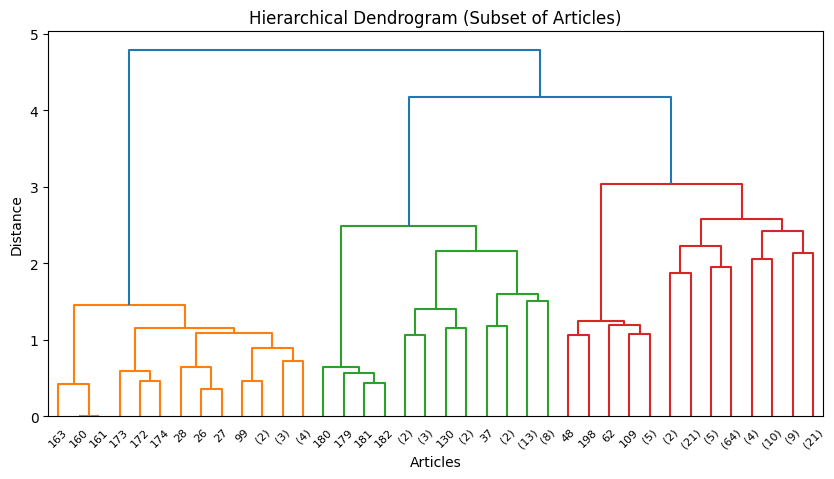

In [ ]:
import matplotlib.pyplot as plt
subset_size = 200
X_subset = X[:subset_size].toarray()

Z = linkage(X_subset, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Dendrogram (Subset of Articles)")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()

In [13]:
n_clusters = 4  # chosen from dendrogram observation

cluster_model = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward"
)

labels = cluster_model.fit_predict(X.toarray())

In [14]:
score = silhouette_score(X, labels)
print(f"Silhouette Score for {n_clusters} clusters: {score:.4f}")

Silhouette Score for 4 clusters: 0.0101


In [15]:
for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    lbls = model.fit_predict(X.toarray())
    sil = silhouette_score(X, lbls)
    print(f"Clusters: {k}, Silhouette Score: {sil:.4f}")

Clusters: 2, Silhouette Score: 0.0093
Clusters: 3, Silhouette Score: 0.0088
Clusters: 4, Silhouette Score: 0.0101
Clusters: 5, Silhouette Score: 0.0088
Clusters: 6, Silhouette Score: 0.0068
Clusters: 7, Silhouette Score: 0.0074
